## SMOTEのシミュレーションコード

In [1]:
import pandas as pd
import numpy as np
from numpy.random import uniform
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

- imblearn.over_sampling.SMOTE(ratio='auto', random_state=None, k=None, k_neighbors=5, m=None, m_neighbors=10, out_step=0.5, kind='regular', svm_estimator=None, n_jobs=1)
- https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.SMOTE.html

In [2]:
data_size = 50

x1 = uniform(low=0, high=10, size=data_size)
x2 = uniform(low=0, high=10, size=data_size)

In [3]:
x1

array([5.97826592, 1.21215848, 3.96582184, 7.68536247, 6.96075367,
       9.67430495, 8.33021081, 4.43873339, 1.72317204, 9.26701823,
       7.49106349, 8.32005995, 8.50970748, 5.3750355 , 8.97832195,
       2.68988279, 2.33334758, 4.62486756, 4.52457945, 6.32329366,
       8.47950438, 6.786897  , 3.5814379 , 7.43068684, 9.4892527 ,
       7.92664746, 0.90584664, 2.90490436, 3.38903698, 0.90680199,
       7.62742749, 0.67560094, 0.25454813, 9.61938763, 3.13344656,
       4.29749193, 0.90641325, 0.22911439, 7.68605866, 9.9970161 ,
       3.7229149 , 1.47392326, 5.07640962, 8.46901317, 0.29435935,
       1.81494254, 3.40896804, 8.85660597, 2.54358162, 9.26910125])

In [4]:
y = []
for i in range(data_size):
    if x1[i]>5 and x2[i]>5:
        if(uniform()>0.6): y.append(1)
        else: y.append(0)
    else:
        if(uniform()>0.95): y.append(1)
        else: y.append(0)

In [5]:
df = pd.DataFrame({"x1":x1, "x2":x2, "y":y})
df["ID"] = df.index
df = df[["ID","x1","x2","y"]]
df

,ID,x1,x2,y
0,0,5.978266,4.473852,0
1,1,1.212158,1.579765,0
2,2,3.965822,3.760947,0
3,3,7.685362,1.547722,0
4,4,6.960754,3.928476,0
5,5,9.674305,3.737672,0
6,6,8.330211,4.061712,0
7,7,4.438733,0.086204,0
8,8,1.723172,7.145714,0
9,9,9.267018,5.700347,0


In [6]:
# 0/1の割合

df["y"].value_counts()

0    44
1     6
Name: y, dtype: int64

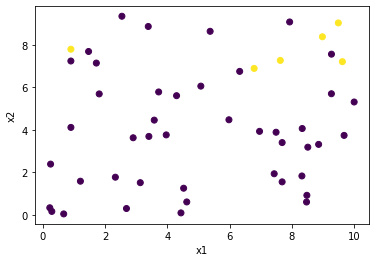

In [7]:
plt.scatter(df["x1"], df["x2"], c=df["y"])
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

### SMOTEによるOver Sampling

In [8]:
# SMOTEによるOver Sampling
smt = SMOTE(random_state=0)
#X_smote, y_smote = smt.fit_sample(df[["x1","x2"]], df["y"].as_matrix().ravel())
X_smote, y_smote = smt.fit_resample(df[["x1","x2"]], df["y"].values.ravel())

In [9]:
# デフォルトハイパーパラメータ
smt.get_params()

{'k_neighbors': 5,
 'n_jobs': None,
 'random_state': 0,
 'sampling_strategy': 'auto'}

In [10]:
df_X = pd.DataFrame(X_smote, columns=["x1","x2"])
df_y = pd.DataFrame(y_smote, columns=["y"])

df_smote = df_X.join(df_y)
df_smote

,x1,x2,y
0,5.978266,4.473852,0
1,1.212158,1.579765,0
2,3.965822,3.760947,0
3,7.685362,1.547722,0
4,6.960754,3.928476,0
...,...,...,...
83,8.922867,8.338687,1
84,3.240014,7.614842,1
85,7.320683,7.133367,1
86,6.790848,6.895749,1


In [11]:
df_smote["y"].value_counts()

1    44
0    44
Name: y, dtype: int64

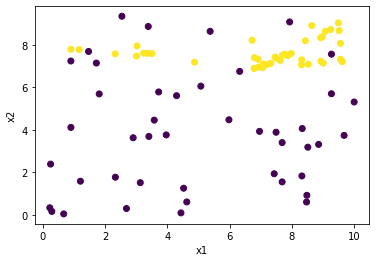

In [12]:
plt.scatter(df_smote["x1"], df_smote["x2"], c=df_smote["y"])
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

### もともと1のデータと、SMOTOによってOver Samplingされたデータを色分けしてみる

In [13]:
df_all = pd.merge(left=df, right=df_smote, how='outer', on=["x1","x2"], suffixes=('_original', '_smote'))
df_all

,ID,x1,x2,y_original,y_smote
0,0.0,5.978266,4.473852,0.0,0
1,1.0,1.212158,1.579765,0.0,0
2,2.0,3.965822,3.760947,0.0,0
3,3.0,7.685362,1.547722,0.0,0
4,4.0,6.960754,3.928476,0.0,0
...,...,...,...,...,...
83,NaN,8.922867,8.338687,NaN,1
84,NaN,3.240014,7.614842,NaN,1
85,NaN,7.320683,7.133367,NaN,1
86,NaN,6.790848,6.895749,NaN,1


In [14]:
# y_allカラムの作成
# 0:もともと0、1:もともと1、2:SMOTEでOver Samplingされたデータ

df_all["y_all"] = df_all["y_original"].fillna(2)
df_all

,ID,x1,x2,y_original,y_smote,y_all
0,0.0,5.978266,4.473852,0.0,0,0.0
1,1.0,1.212158,1.579765,0.0,0,0.0
2,2.0,3.965822,3.760947,0.0,0,0.0
3,3.0,7.685362,1.547722,0.0,0,0.0
4,4.0,6.960754,3.928476,0.0,0,0.0
...,...,...,...,...,...,...
83,NaN,8.922867,8.338687,NaN,1,2.0
84,NaN,3.240014,7.614842,NaN,1,2.0
85,NaN,7.320683,7.133367,NaN,1,2.0
86,NaN,6.790848,6.895749,NaN,1,2.0


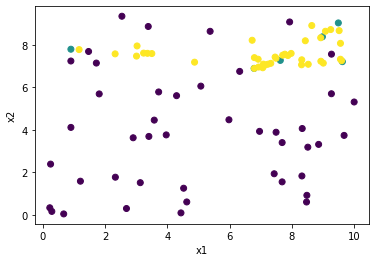

In [15]:
plt.scatter(df_all["x1"], df_all["x2"], c=df_all["y_all"])
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

### 参照
- https://arxiv.org/pdf/1106.1813.pdf